<a href="https://colab.research.google.com/github/salochaud/aprendizajeautomatico/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

plt.rcParams["figure.figsize"] = (8, 5)


df = pd.read_csv('/content/database_24_25.csv')

display(df.head())
print(df.columns)

feature_cols = [
    'MP','FG','FGA','FG%','3P','3PA','3P%',
    'FT','FTA','FT%','ORB','DRB','TRB',
    'AST','STL','BLK','TOV','PF','PTS'
]
target_col = 'GmSc'

df_model = df[feature_cols + [target_col]].dropna()
print("Shape después de dropna:", df_model.shape)

scaler = StandardScaler()
scaled = scaler.fit_transform(df_model)
df_scaled = pd.DataFrame(scaled, columns=feature_cols + [target_col])
df_scaled.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


Index(['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', 'Data'],
      dtype='object')
Shape después de dropna: (16512, 20)


,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,0.724533,3.117867,1.602348,1.374780,4.430242,2.386715,1.618377,-0.256533,-0.006284,0.188782,-0.748994,0.341561,-0.028483,2.887455,0.232101,0.638285,-0.191676,-0.521558,2.999029,3.774915
1,1.392649,2.196424,2.425902,0.197986,-0.164124,-0.151653,0.242019,5.116666,4.828619,1.030994,1.438376,3.653498,3.421234,0.591618,0.232101,3.038231,-0.191676,-0.521558,2.885769,3.250708
2,0.387722,1.274982,0.778795,0.735389,3.117566,2.069419,1.174729,0.191234,-0.006284,1.336209,-0.748994,-0.026432,-0.315959,0.591618,0.232101,-0.561688,-0.891575,-0.521558,1.526646,1.767586
3,0.744723,0.967834,0.119952,1.374780,1.804890,0.800235,1.408779,-0.704300,-0.750115,-0.958645,0.709253,-0.394425,-0.028483,0.591618,0.232101,-0.561688,-0.891575,0.174640,0.847085,1.396806
4,0.316138,1.274982,0.284663,1.461078,1.804890,0.482939,1.873388,0.191234,0.365631,0.572023,-0.748994,-1.130411,-1.178389,-0.173662,-0.776971,-0.561688,-0.191676,-0.521558,1.300126,1.179451


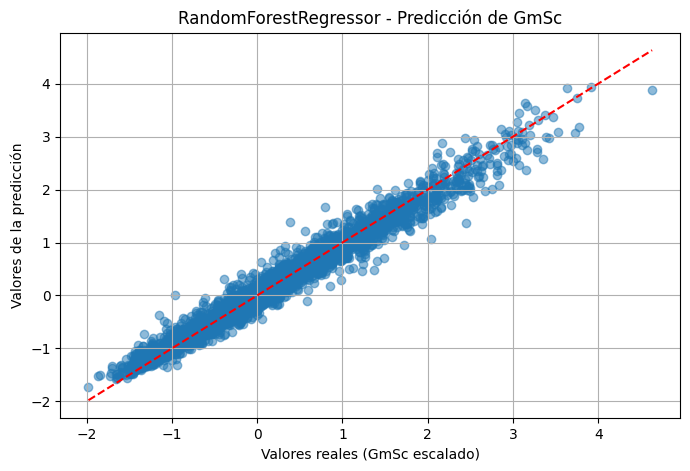

In [2]:
# Separar variables predictoras (X) y objetivo (y)
X = df_scaled[feature_cols]
y = df_scaled[[target_col]]  # como DataFrame

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Entrenar modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train.values.ravel())

# Predicciones
y_pred = model.predict(X_test)

# Gráfica scatter: valores reales vs predicción
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales (GmSc escalado)")
plt.ylabel("Valores de la predicción")
plt.title("RandomForestRegressor - Predicción de GmSc")
plt.grid(True)
plt.show()

In [3]:
# Cálculo de métricas de error: MAE, MSE, RMSE, MAPE

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mape = np.mean(np.abs((y_test.values.flatten() - y_pred) / y_test.values.flatten())) * 100

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}%")

MAE: 0.115
MSE: 0.028
RMSE: 0.167
MAPE: 64.362%


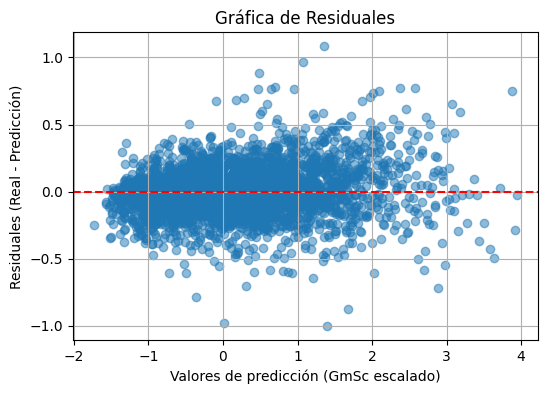

In [4]:
# Gráfica de residuales

residuals = y_test.values.flatten() - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Valores de predicción (GmSc escalado)")
plt.ylabel("Residuales (Real - Predicción)")
plt.title("Gráfica de Residuales")
plt.grid(True)
plt.show()

,feature,importance
18,PTS,0.845306
3,FG%,0.045200
13,AST,0.024358
12,TRB,0.020589
16,TOV,0.015978
14,STL,0.009383
2,FGA,0.007122
0,MP,0.004076
10,ORB,0.004037
17,PF,0.003773


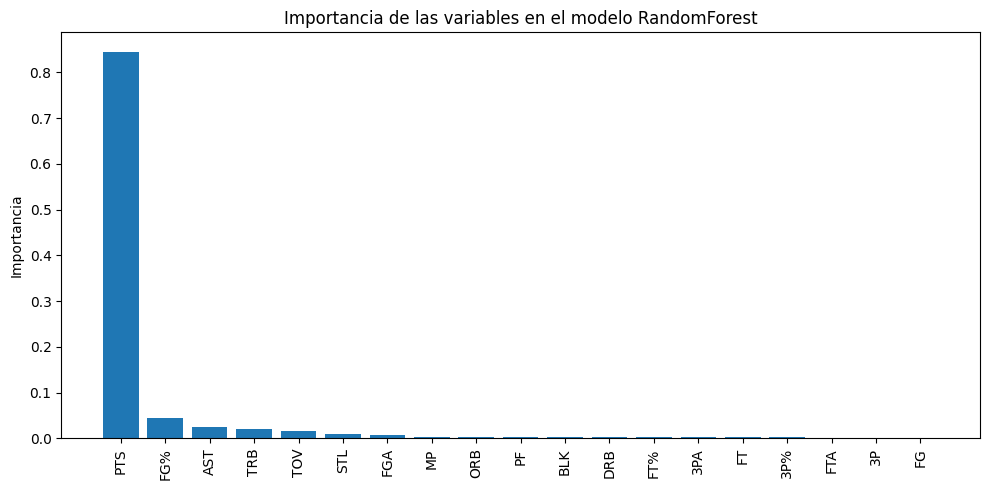

In [5]:
# Importancia de características según RandomForest

importances = model.feature_importances_
feat_imp = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values("importance", ascending=False)

display(feat_imp)

plt.figure(figsize=(10, 5))
plt.bar(feat_imp["feature"], feat_imp["importance"])
plt.xticks(rotation=90)
plt.title("Importancia de las variables en el modelo RandomForest")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

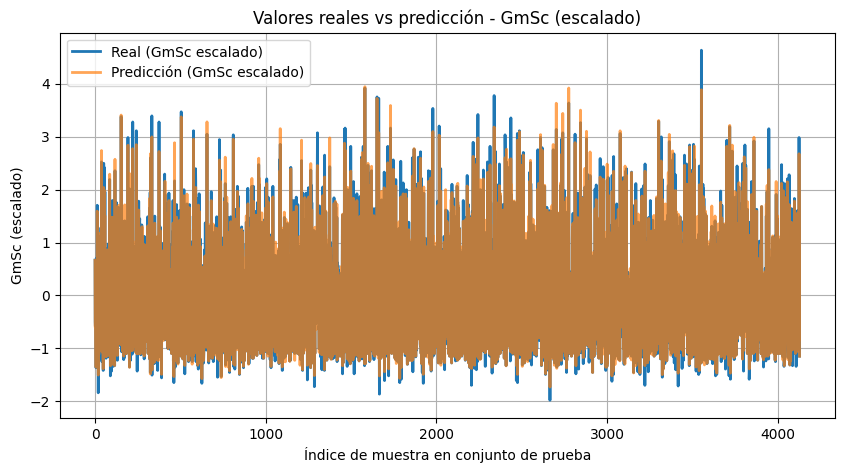

In [6]:
# Comparación visual entre valores reales y predichos (ordenados por índice de prueba)

plt.figure(figsize=(10, 5))
plt.plot(y_test.values.flatten(), label="Real (GmSc escalado)", linewidth=2)
plt.plot(y_pred, label="Predicción (GmSc escalado)", linewidth=2, alpha=0.7)
plt.title("Valores reales vs predicción - GmSc (escalado)")
plt.xlabel("Índice de muestra en conjunto de prueba")
plt.ylabel("GmSc (escalado)")
plt.legend()
plt.grid(True)
plt.show()